# Projekt Końcowy

## Spis Treści
- [Opis problemu](#opis-problemu)
- [Zmienne użyte w analizie](#zmienne-użyte-w-analizie)
  - [Cena produktów A i B](#cena-produktow-a-i-b)
  - [Kurs euro](#kurs-euro)
  - [Koszty transportu](#koszty-transportu)
  - [Koszty pracy 4 pracowników](#koszty-pracy-4-pracowników)
  - [Koszty wynajmu nieruchomości](#koszty-wynajmu-nieruchomości)
  - [Zapotrzebowanie na produkty](#zapotrzebowanie-na-produkty)
- [Funkcja główna](#funkcja-główna)
- [Analiza wyniku](#analiza-wyniku)
- [Analiza wrazliwosci](#analiza-wrazliwosci)
  - [Kurs euro](#kurs-euro)
  - [Ceny produktow w Polsce](#ceny-produktow-w-polsce)
  - [Zmiana w wynikach w zaleznosci od liczby powtorzen](#zmiana-w-wynikach-w-zaleznosci-od-liczby-powtorzen)
- [Wnioski i zalecenia](#wnioski-i-zalecenia)


## Opis problemu

Historia małżeństwa, które rozważa otwarcie firmy sprowadzającej dwa produkty z Niemiec, jest interesującym przypadkiem przedsięwzięcia biznesowego. Przed podjęciem decyzji o otwarciu firmy, małżonkowie starają się dokładnie przeanalizować różne czynniki, które mogą wpłynąć na opłacalność przedsięwzięcia. Poniżej przedstawiam ich rozważania.

Przy analizie biorą pod uwagę:
- Cena zakupu produktów w Niemczech: Właściciele firmy rozważają zakup dwóch produktów z Niemiec. Koszt zakupu jednostkowego dla produktu A wynosi 5 euro, a dla produktu B wynosi 7 euro. Jednak ceny te mogą różnić się co miesiąc o niewielką wartość. Odchylenie standardowe dla ceny produktu A wynosi 0,05 euro, a dla produktu B wynosi 0,1 euro. Małżonkowie muszą uwzględnić te wahania cenowe podczas obliczania swoich zysków.
- Kurs waluty Euro: Kurs waluty Euro ma bezpośredni wpływ na koszty zakupu produktów z Niemiec. Na dzień 1 stycznia kurs wynosi 4,50 zł, jednak jego odchylenie standardowe wynosi 0,05 zł. Właściciele firmy interesują się tylko kursem z pierwszego dnia każdego miesiąca, ponieważ wtedy zaopatrują się w walutę. Fluktuacje kursu mogą wpłynąć na koszty zakupu produktów oraz na wartość ich zysków.
- Koszty transportu: Małżonkowie uwzględniają koszty transportu, które obejmują płacę kierowcy w wysokości 7000 zł oraz koszt paliwa. Cena paliwa zazwyczaj wynosi 4,60 zł, a wariancja wynosi 0,01. W przypadku jednej trasy w dwie strony, zużywane jest 200 litrów paliwa. Koszty transportu mają bezpośredni wpływ na marże zysku, dlatego są brane pod uwagę.
- Koszty płacy dla pracowników: Właściciele firmy muszą uwzględnić koszty płacy dla 4 pracowników, z których każdy zarabia 4500 zł. Te koszty stałe są istotne dla obliczenia ogólnych kosztów działalności.
- Koszt wynajmu nieruchomości: Firma ma wynajętą nieruchomość, w której znajduje się sklep. Koszt wynajmu wynosi 6000 zł. Jest to kolejny stały koszt, który wpływa na ogólne koszty przedsiębiorstwa.
- Zapotrzebowanie na produkty w Polsce: Właściciele firmy analizują wahające się zapotrzebowanie na produkty w Polsce. Przewidują sprzedaż 550 sztuk produktu A i 440 sztuk produktu B. Jednak jeśli popyt okaże się mniejszy niż zakupiona ilość, niesprzedane sztuki zostaną zmagazynowane, a w następnym miesiącu zostaną dokupione tyle sztuk, aby osiągnąć pożądaną ilość. Zapotrzebowanie na produkty ma bezpośredni wpływ na możliwość generowania zysków.

Właściciele firmy ustalili ceny sprzedaży produktów A i B odpowiednio na 60 zł i 100 zł. Dodatkowo rozważają alternatywną opcję zatrudnienia się na etat, co zapewniłoby im dochód w wysokości 165 000 zł rocznie.

Aby osiągnąć sukces i przekroczyć dochód z alternatywnej opcji zatrudnienia, właściciele firmy muszą dokładnie przeanalizować powyższe czynniki, obliczyć koszty operacyjne, takie jak zakup produktów, koszty transportu, płace pracowników i wynajem nieruchomości, oraz oszacować możliwe zyski ze sprzedaży. Następnie porównają oczekiwane zyski z alternatywnym dochodem, aby podjąć decyzję dotyczącą otwarcia firmy i osiągnięcia zamierzonego sukcesu finansowego.

## Zmienne uzyte w analizie

### Cena produktow A i B

Wynoszą odpowiednio 5 i 7 Euro, jednak mogą się różnić co miesiąc o niewielką wartość. Odchylenie standardowe ceny wynosi kolejno 0,05 i 0,1 Euro.

In [1]:
using HTTP
using JSON

In [2]:
using Distributions
using Plots
using StatsPlots
using Statistics

In [3]:
dist_A = Normal(5, 0.05)
dist_B = Normal(7, 0.1)

cena_A = Dict()
for i in 1:12
    value = round(rand(dist_A), digits = 2)
    cena_A[i] = value
end
cena_A = sort(collect(cena_A), by = x -> x[1])

cena_B = Dict()
for i in 1:12
    value = round(rand(dist_B), digits = 2)
    cena_B[i] = value
end
cena_B = sort(collect(cena_B), by = x -> x[1])

print(cena_A)
print(cena_B)


Pair{Any, Any}[1 => 4.95, 2 => 4.99, 3 => 5.05, 4 => 4.98, 5 => 5.02, 6 => 5.01, 7 => 4.89, 8 => 5.08, 9 => 4.95, 10 => 5.02, 11 => 5.02, 12 => 5.02]Pair{Any, Any}[1 => 7.15, 2 => 6.95, 3 => 7.13, 4 => 6.98, 5 => 7.01, 6 => 7.15, 7 => 7.11, 8 => 6.65, 9 => 6.91, 10 => 7.04, 11 => 6.84, 12 => 7.0]

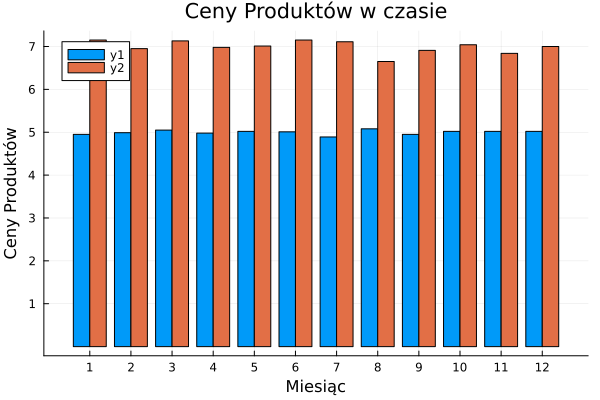

In [4]:
cena_Aw = [pair[2] for pair in cena_A]
cena_Bw = [pair[2] for pair in cena_B]

p = groupedbar([cena_Aw cena_Bw], xlabel = "Miesiąc", ylabel = "Ceny Produktów", title = "Ceny Produktów w czasie")
xticks!(1:12)
yticks!(1:7)

### Kurs euro

Dane zostały pobrane poprzez API NPB dla roku 2022. Na dzień 1 stycznia kurs jest równy 4.59 zł. Właścicieli interesuje jedynie kurs z pierwszego dnia każdego miesiąca, ponieważ wtedy zaopatrują się w bliżej nieokreśloną ilość waluty, która starcza im do końca miesiąca.

In [5]:
import Pkg; Pkg.add("JSON")
import Pkg; Pkg.add("HTTP")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [9]:
using HTTP
using JSON

url = "https://api.nbp.pl/api/exchangerates/rates/A/EUR/2022-01-01/2022-12-31/?format=json"
response = HTTP.get(url)
data = JSON.parse(String(response.body))
    
exchange_rates_dict = Dict()

rates = data["rates"]

for rate in rates
    date_parts = split(rate["effectiveDate"], '-')
    month = parse(Int, date_parts[2])
    mid = rate["mid"]
    exchange_rates_dict[month] = mid
end

kurs = sort(collect(exchange_rates_dict), by = x -> x[1])
println(kurs)

Pair{Any, Any}[1 => 4.5982, 2 => 4.6909, 3 => 4.6525, 4 => 4.6582, 5 => 4.5756, 6 => 4.6806, 7 => 4.7399, 8 => 4.7265, 9 => 4.8698, 10 => 4.7089, 11 => 4.6684, 12 => 4.6899]


In [10]:
values_arr = [pair[2] for pair in kurs]
avg_exchange_rate = mean(values_arr)

println("Średnia wartość kursu Euro: $avg_exchange_rate")

min_exchange_rate = minimum(values(values_arr))
max_exchange_rate = maximum(values(values_arr))

# println("Wartość minimalna: ", rate_min)
# println("Wartość maksymalna: ", rate_max)
println("Wartość minimalna: ", min_exchange_rate)
println("Wartość maksymalna: ", max_exchange_rate)

Średnia wartość kursu Euro: 4.688283333333334
Wartość minimalna: 4.5756
Wartość maksymalna: 4.8698


In [98]:
sorted_keys = [pair[1] for pair in kurs]
kursw = [pair[2] for pair in kurs]

12-element Vector{Float64}:
 4.5982
 4.6909
 4.6525
 4.6582
 4.5756
 4.6806
 4.7399
 4.7265
 4.8698
 4.7089
 4.6684
 4.6899

[ Info: Saved animation to /Users/aleksandrarozwadowska/Documents/sgh/zms/projekt/zms_prjekt_koncowy/tmp.gif


Plots.AnimatedGif("/Users/aleksandrarozwadowska/Documents/sgh/zms/projekt/zms_prjekt_koncowy/tmp.gif")
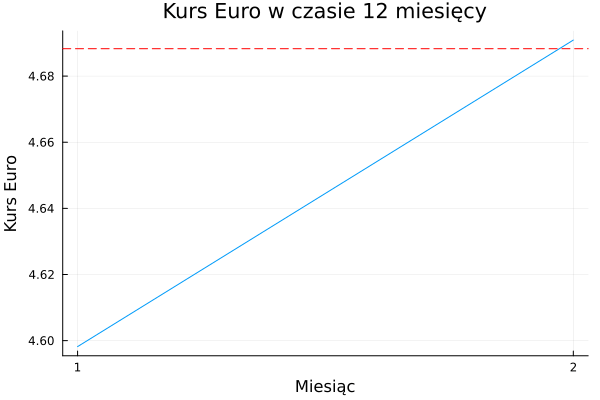

In [97]:
using Plots 
a = @animate for i in 2:12
    plot(sorted_keys[1:i], kursw[1:i], xlabel = "Miesiąc", ylabel = "Kurs Euro", legend = false, title = "Kurs Euro w czasie 12 miesięcy")
    xticks!(1:12)
    hline!([avg_exchange_rate], line = :dash, color = :red)
end
gif(a, fps=1.5) 

Na powyższym wykresie zostały pokazane wartości kursu dla każdego pierwszego dnia miesiąca.
Czerwoną linią została pokazana uśredniona wartość z 12 miesięcy której będziemy używac do symulacji.


### Koszty transportu

Płaca kierowcy wynosząca 7000 zł i cena paliwa, która zazwyczaj wynosi 4,60 zł z wariancją równą 0,01. Tir przez całą trasę w dwie strony spali 200 l paliwa

In [100]:
dist_transport = Normal(4.6, 0.01)

transport = Dict()
for i in 1:12
    value = 7000+(round(rand(dist_transport), digits = 2)*200)
    transport[i] = value
end

print(transport)


Dict{Any, Any}(5 => 7922.0, 12 => 7918.0, 8 => 7922.0, 1 => 7918.0, 6 => 7920.0, 11 => 7922.0, 9 => 7920.0, 3 => 7922.0, 7 => 7922.0, 4 => 7920.0, 2 => 7920.0, 10 => 7922.0)

### Koszty pracy 4 pracowników

Każdy zarabia kwotę 4500 zł

In [101]:
koszty_pracy = Dict(
    1 => 4 * 4500,
    2 => 4 * 4500,
    3 => 4 * 4500,
    4 => 4 * 4500,
    5 => 4 * 4500,
    6 => 4 * 4500,
    7 => 4 * 4500,
    8 => 4 * 4500,
    9 => 4 * 4500,
    10 => 4 * 4500,
    11 => 4 * 4500,
    12 => 4 * 4500
)

println(koszty_pracy)


Dict(5 => 18000, 7 => 18000, 12 => 18000, 8 => 18000, 1 => 18000, 4 => 18000, 6 => 18000, 2 => 18000, 10 => 18000, 11 => 18000, 9 => 18000, 3 => 18000)


### Koszt wynajmu nieruchomości

6000 zł miesięcznie

In [102]:
nieruchomosc = Dict(
    1 => 6000,
    2 => 6000,
    3 => 6000,
    4 => 6000,
    5 => 6000,
    6 => 6000,
    7 => 6000,
    8 => 6000,
    9 => 6000,
    10 => 6000,
    11 => 6000,
    12 => 6000
)

println(nieruchomosc)

Dict(5 => 6000, 7 => 6000, 12 => 6000, 8 => 6000, 1 => 6000, 4 => 6000, 6 => 6000, 2 => 6000, 10 => 6000, 11 => 6000, 9 => 6000, 3 => 6000)


### Zapotrzebowanie na produkty

500 i 400 odpowiednio, z odchyleniem standardowym wynoszącym odpowiednio 20 i 30

In [103]:
dist_Az = Normal(500, 20)
dist_Bz = Normal(400, 30)

zapotrzebowanie_A = Dict()
for i in 1:12
    value = round(rand(dist_Az))
    zapotrzebowanie_A[i] = value
end
zapotrzebowanie_A = sort(collect(zapotrzebowanie_A), by = x -> x[1])

zapotrzebowanie_B = Dict()
for i in 1:12
    value = round(rand(dist_Bz))
    zapotrzebowanie_B[i] = value
end
cena_B = sort(collect(zapotrzebowanie_B), by = x -> x[1])

print(zapotrzebowanie_A)
print(zapotrzebowanie_B)


Pair{Any, Any}[1 => 487.0, 2 => 520.0, 3 => 506.0, 4 => 516.0, 5 => 509.0, 6 => 494.0, 7 => 471.0, 8 => 492.0, 9 => 474.0, 10 => 543.0, 11 => 458.0, 12 => 510.0]Dict{Any, Any}(5 => 403.0, 12 => 340.0, 8 => 412.0, 1 => 370.0, 6 => 342.0, 11 => 444.0, 9 => 415.0, 3 => 419.0, 7 => 402.0, 4 => 435.0, 2 => 410.0, 10 => 418.0)

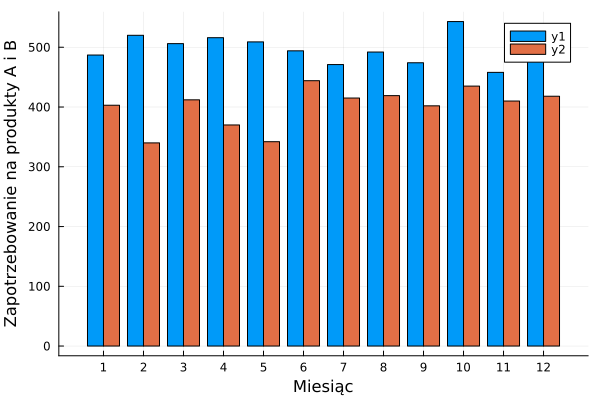

In [104]:
zapotrzebowanie_Aw = [pair[2] for pair in zapotrzebowanie_A]
zapotrzebowanie_Bw = [pair[2] for pair in zapotrzebowanie_B]

groupedbar([zapotrzebowanie_Aw zapotrzebowanie_Bw], xlabel = "Miesiąc", ylabel = "Zapotrzebowanie na produkty A i B")
xticks!(1:12)

## Funkcja główna

In [105]:
function model(price_generated_A::T, price_generated_B::T,
        std_price_A::T, std_price_B::T,
        exchange_rate::T, std_exchange_rate::T,
        salary::T, fuel_price::T, fuel_variance::T, fuel_consumption::T,
        num_employees::S, employee_salary::T, rent::T,
        demand_A::T, demand_B::T, std_demand_A::T, std_demand_B::T, polish_price_A::T, polish_price_B::T;
        seed::S=-1) where {T<:AbstractFloat, S<:Int}

    seed == -1 || Random.seed!(seed)

    monthly_profits = zeros(T, 12)

    unsold_A = 0
    unsold_B = 0

    for month in 1:12
        salaries = num_employees * employee_salary
        transportation = salary + (round(rand(Normal(fuel_price, fuel_variance)), digits = 2) * fuel_consumption)
        euro = round(rand(Normal(exchange_rate, std_exchange_rate)), digits = 2)

        price_A = round(rand(Normal(price_generated_A, std_price_A)), digits = 2)
        price_B = round(rand(Normal(price_generated_B, std_price_B)), digits = 2)

        demand_A_month = min(rand(Normal(demand_A, std_demand_A)), 550.0)
        demand_B_month = min(rand(Normal(demand_B, std_demand_B)), 440.0)

        revenue = demand_A_month * polish_price_A + demand_B_month * polish_price_B

        cost = salaries + transportation + rent + (550.0 - unsold_A)*price_A*euro + (440.0 - unsold_B)*price_B*euro

        profit = revenue - cost
        monthly_profits[month] = profit

        unsold_A = max(0, 550 - demand_A_month)
        unsold_B = max(0, 440 - demand_B_month)
    end

    yearly_profit = sum(monthly_profits)

    return yearly_profit
end


model (generic function with 1 method)

In [106]:
function wywolanie(price_generated_A::T, price_generated_B::T,
    std_price_A::T, std_price_B::T,
    exchange_rate::T, std_exchange_rate::T,
    salary::T, fuel_price::T, fuel_variance::T, fuel_consumption::T,
    num_employees::S, employee_salary::T, rent::T,
    demand_A::T, demand_B::T, std_demand_A::T, std_demand_B::T, polish_price_A::T, polish_price_B::T, liczba_powtorzen::S) where {T<:AbstractFloat, S<:Int}

    wynik = T[]
    for seed in 1:liczba_powtorzen
        push!(wynik, model(price_generated_A, price_generated_B, std_price_A, std_price_B, exchange_rate, std_exchange_rate, salary, fuel_price, fuel_variance, fuel_consumption, num_employees, employee_salary, rent, demand_A, demand_B, std_demand_A, std_demand_B, polish_price_A, polish_price_B))
    end

    valid_results = wynik[wynik .> 0]
    count_greater_than_160k = count(x -> x > 165000, valid_results)

    return (sredni_wynik = round(mean(valid_results), digits = 2), std = std(valid_results), probability = count_greater_than_160k/liczba_powtorzen, percentyl_5=quantile(valid_results, 0.05), percentyl_95=quantile(valid_results, 0.95))

end

wywolanie (generic function with 1 method)

## Analiza wyniku

Po przeprowadzeniu 10 000 powtórzeń analizy, średnie roczne zarobki wyniosły około 167 000 zł. Odchylenie standardowe tych zarobków wyniosło 7 000 zł. Istnieje prawdopodobieństwo równa 0,62, że wynik końcowy, czyli roczne zarobki, będzie wyższy niż 165 000 zł.

To oznacza, że na podstawie przeprowadzonej analizy, małżeństwo ma około 62% szans na osiągnięcie rocznych zarobków przekraczających kwotę 165 000 zł. Oczywiście, istnieje również około 37% szans na osiągnięcie rocznych zarobków niższych niż ta wartość.

Warto jednak pamiętać, że odchylenie standardowe wskazuje na zmienność wyników, a wynik końcowy może się różnić w zależności od wielu czynników, takich jak zmiany w cenach, kursach walut, popycie na produkty itp. Dlatego ważne jest monitorowanie i dostosowywanie strategii biznesowej w odpowiedzi na zmieniające się warunki rynkowe.

In [107]:
price_generated_A = 5.0
price_generated_B = 7.0
std_price_A = 0.05
std_price_B = 0.1
exchange_rate = avg_exchange_rate
std_exchange_rate = 0.05
salary = 7000.0
fuel_price = 4.6
fuel_variance = 0.01
fuel_consumption = 200.0
num_employees = 4
employee_salary = 4500.0
rent = 6000.0
demand_A = 500.0
demand_B = 400.0
std_demand_A = 20.0
std_demand_B = 30.0
polish_price_A = 60.0
polish_price_B = 100.0
liczba_powtorzen = 10000

10000

In [108]:
results = wywolanie(price_generated_A, price_generated_B, std_price_A, std_price_B, exchange_rate, std_exchange_rate, salary, fuel_price, fuel_variance, fuel_consumption, num_employees, employee_salary, rent, demand_A, demand_B, std_demand_A, std_demand_B, polish_price_A, polish_price_B, liczba_powtorzen)

println("Po przeprowadzeniu ", liczba_powtorzen, " powtorzen analizy, srednie roczne zarobki wyniosly ", results.sredni_wynik, ". Ich odchylenie standardowe to ", results.std, ", a prawdopodobienstwo, ze wynik koncowy bedzie wyzszy niz 165000 to ", results.probability, ".")

Po przeprowadzeniu 10000 powtorzen analizy, srednie roczne zarobki wyniosly 155159.82. Ich odchylenie standardowe to 7452.180069454965, a prawdopodobienstwo, ze wynik koncowy bedzie wyzszy niz 165000 to 0.0898.


## Analiza wrazliwosci

### Kurs euro

Jeśli kurs waluty wzrośnie w stosunku do polskiej waluty, to koszt zakupu produktów z zagranicy również wzrośnie. To może obniżyć marże zysku i zmniejszyć prawdopodobieństwo osiągnięcia pozytywnego wyniku finansowego. Z drugiej strony, jeśli kurs waluty spadnie, koszty zakupu mogą się obniżyć, co zwiększa szanse na pozytywny wynik.

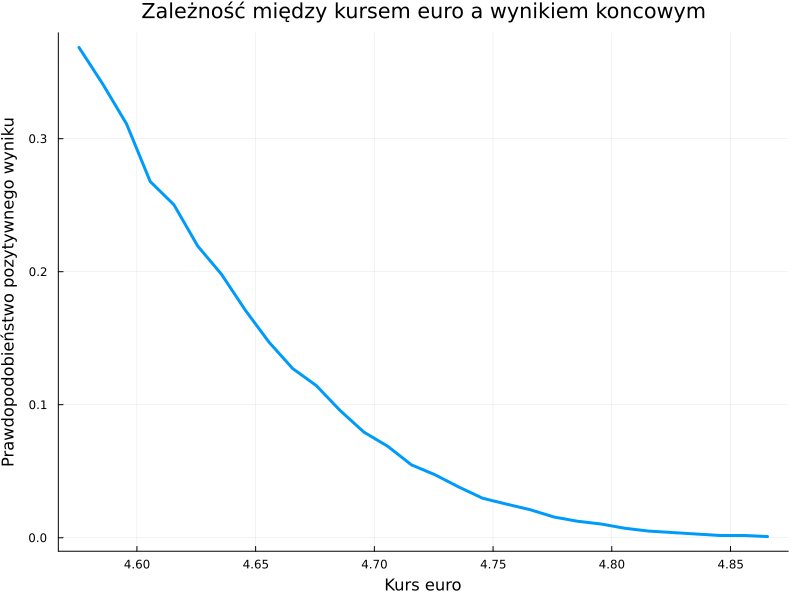

In [151]:
price_generated_A = 5.0
price_generated_B = 7.0
std_price_A = 0.05
std_price_B = 0.1
exchange_rate = min_exchange_rate:0.01:max_exchange_rate
std_exchange_rate = 0.05
salary = 7000.0
fuel_price = 4.6
fuel_variance = 0.01
fuel_consumption = 200.0
num_employees = 4
employee_salary = 4500.0
rent = 6000.0
demand_A = 500.0
demand_B = 400.0
std_demand_A = 20.0
std_demand_B = 30.0
polish_price_A = 60.0
polish_price_B = 100.0
liczba_powtorzen = 10000

prawdopodobienstwo = Float64[]

for wartosc in exchange_rate
    wynik = wywolanie(price_generated_A, price_generated_B, std_price_A, std_price_B, wartosc, std_exchange_rate, salary, fuel_price, fuel_variance, fuel_consumption, num_employees, employee_salary, rent, demand_A, demand_B, std_demand_A, std_demand_B, polish_price_A, polish_price_B, liczba_powtorzen)
    push!(prawdopodobienstwo, wynik.probability)
end


plot(exchange_rate, prawdopodobienstwo, xlabel = "Kurs euro", ylabel = "Prawdopodobieństwo pozytywnego wyniku",
    title = "Zależność między kursem euro a wynikiem koncowym",
    legend = false, linewidth = 3, size = (800, 600))

[ Info: Saved animation to /Users/aleksandrarozwadowska/Documents/sgh/zms/projekt/zms_prjekt_koncowy/tmp.gif


Plots.AnimatedGif("/Users/aleksandrarozwadowska/Documents/sgh/zms/projekt/zms_prjekt_koncowy/tmp.gif")
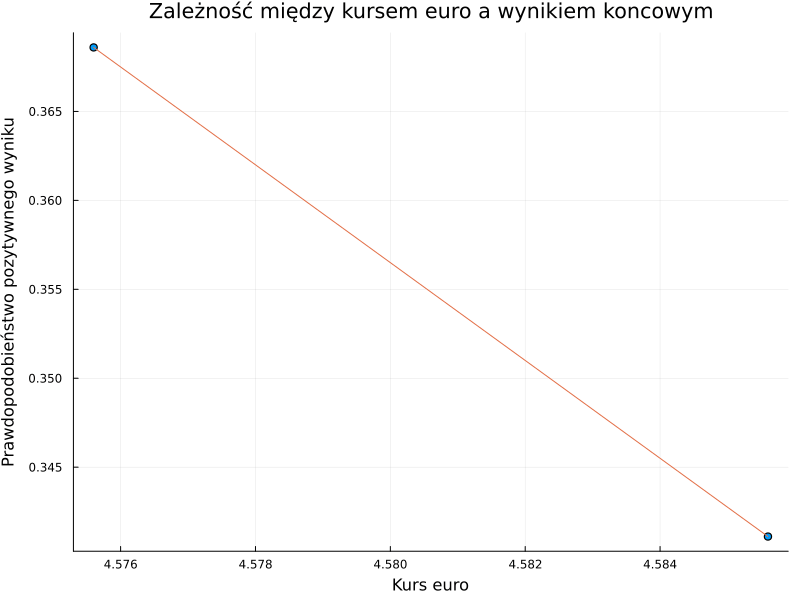

In [158]:

a = @animate for i in 2:length(exchange_rate)
    exrate = exchange_rate[1:i]
    prawdop = prawdopodobienstwo[1:i]
    df_exchange_rate = DataFrame(rate = exrate, probability = prawdop)

    lm1 = lm(@formula(probability ~ rate), df_exchange_rate);
    coeftable(lm1)
    
    df_exchange_rate[!, "prediction"] = predict(lm1);
    
    
    plot(df_exchange_rate.rate, df_exchange_rate.probability, xlabel = "Kurs euro", ylabel = "Prawdopodobieństwo pozytywnego wyniku", 
        title = "Zależność między kursem euro a wynikiem koncowym", legend = false, 
        linewidth = 3, size = (800, 600), seriestype = :scatter)
    plot!(df_exchange_rate.rate, df_exchange_rate.prediction, seriestype = :line)
end
gif(a, fps=2) 

Do wygenerowania powyższej wizualizacji została użyta minimalna i maksymalna wartość z całego poprzedniego roku za pomocą ściągniętych danych. Jednak na wykresie możemy zaobserwować jedynie małą część wahań odnośnie kursu Euro. Spróbujmy więc wygenerować wiekszy zakres.

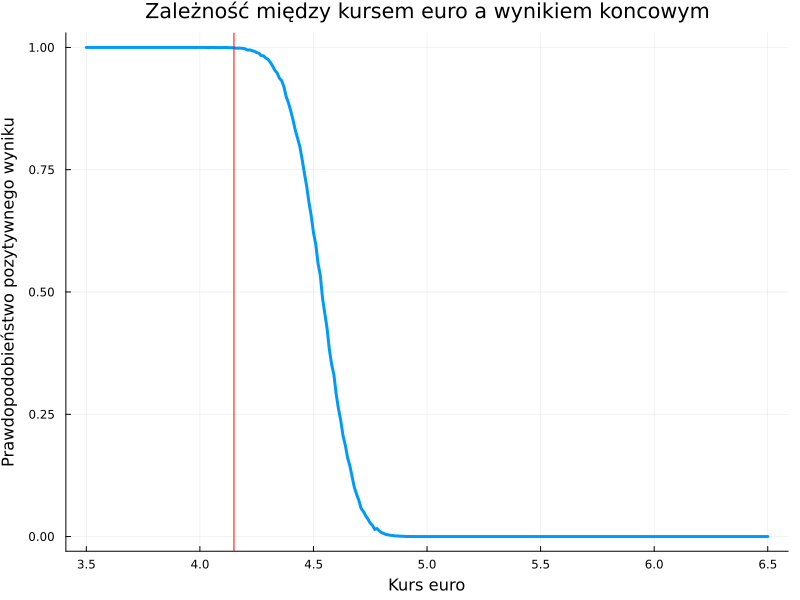

In [53]:
price_generated_A = 5.0
price_generated_B = 7.0
std_price_A = 0.05
std_price_B = 0.1
exchange_rate = 3.5:0.01:6.5
std_exchange_rate = 0.05
salary = 7000.0
fuel_price = 4.6
fuel_variance = 0.01
fuel_consumption = 200.0
num_employees = 4
employee_salary = 4500.0
rent = 6000.0
demand_A = 500.0
demand_B = 400.0
std_demand_A = 20.0
std_demand_B = 30.0
polish_price_A = 60.0
polish_price_B = 100.0
liczba_powtorzen = 10000

prawdopodobienstwo = Float64[]

for wartosc in exchange_rate
    wynik = wywolanie(price_generated_A, price_generated_B, std_price_A, std_price_B, wartosc, std_exchange_rate, salary, fuel_price, fuel_variance, fuel_consumption, num_employees, employee_salary, rent, demand_A, demand_B, std_demand_A, std_demand_B, polish_price_A, polish_price_B, liczba_powtorzen)
    push!(prawdopodobienstwo, wynik.probability)
end


plot(exchange_rate, prawdopodobienstwo, xlabel = "Kurs euro", ylabel = "Prawdopodobieństwo pozytywnego wyniku",
    title = "Zależność między kursem euro a wynikiem koncowym",
    legend = false, linewidth = 3, size = (800, 600))
vline!([4.15], color="red")

Przy wygenerowaniu większego zakresu kursu Euro możemy zaobserwować że przy kursie równym lub mniejszym niż 4.15 prawdopodobieńśtwo osiągniecia wyniku 1 jest bardzo bliskie. Zaś zwiększanie się wartości kursu Euro będzie powodowało drastyczne zmiejszanie się prawdopodobieńśtwa. 

### Ceny produktow w Polsce

Jeśli ceny produktów wzrosną w Polsce, to marże zysku mogą również wzrosnąć, jeśli przedsiębiorstwo utrzyma swoje ceny sprzedaży. To zwiększy prawdopodobieństwo osiągnięcia pozytywnego wyniku finansowego. Jednak jeśli przedsiębiorstwo nie podniesie cen sprzedaży, wzrost kosztów może obniżyć marże zysku i zmniejszyć prawdopodobieństwo pozytywnego wyniku.

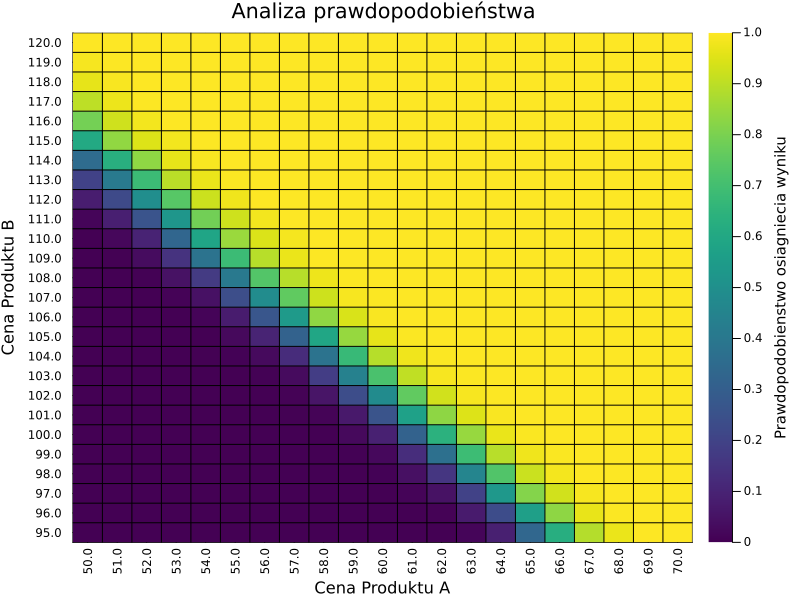

In [54]:
price_generated_A = 5.0
price_generated_B = 7.0
std_price_A = 0.05
std_price_B = 0.1
exchange_rate = avg_exchange_rate
std_exchange_rate = 0.05
salary = 7000.0
fuel_price = 4.6
fuel_variance = 0.01
fuel_consumption = 200.0
num_employees = 4
employee_salary = 4500.0
rent = 6000.0
demand_A = 500.0
demand_B = 400.0
std_demand_A = 20.0
std_demand_B = 30.0
polish_price_A = 50.0:1:70.0
polish_price_B = 95.0:1:120.0
liczba_powtorzen = 1000

heatmap_data = zeros(length(polish_price_A), length(polish_price_B))

for (i, A) in enumerate(polish_price_A)
    for (j, B) in enumerate(polish_price_B)
        wynik = wywolanie(price_generated_A, price_generated_B, std_price_A, std_price_B, exchange_rate, std_exchange_rate, salary, fuel_price, fuel_variance, fuel_consumption, num_employees, employee_salary, rent, demand_A, demand_B, std_demand_A, std_demand_B, A, B, liczba_powtorzen)
        prawd = wynik.probability
        heatmap_data[i, j] = prawd
    end
end

heatmap(polish_price_A, polish_price_B, heatmap_data',
    xlabel = "Cena Produktu A",
    ylabel = "Cena Produktu B",
    title = "Analiza prawdopodobieństwa",
    color = :viridis,
    cbar_title = "Prawdopodobienstwo osiagniecia wyniku",
    yrotation=0,
    xrotation=90)
xticks!(50.0:1.0:70.0, [string(y) for y in 50.0:1.0:70.0])
yticks!(95.0:1.0:120.0, [string(y) for y in 95.0:1.0:120.0])
plot!(legend=false, size=(800, 600))

prod_a = collect(50.0:1.0:70.0)
prod_b = collect(95.0:1.0:120.0)
vline!([prod_a .+ 0.5], color="black")
hline!([prod_b .+ 0.5], color="black")

In [38]:
import Pkg; Pkg.add("PlotlyJS")

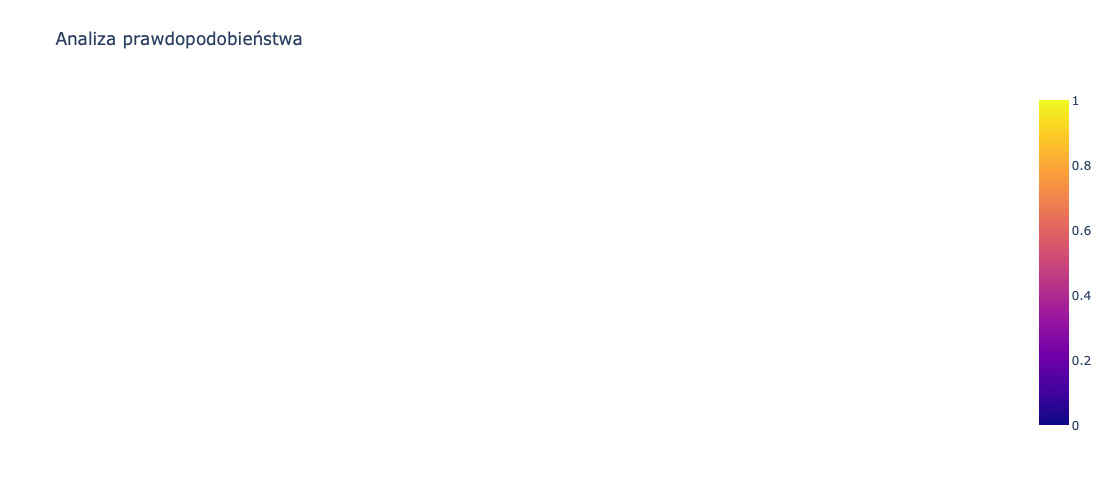

In [37]:
using PlotlyJS


price_generated_A = 5.0
price_generated_B = 7.0
std_price_A = 0.05
std_price_B = 0.1
exchange_rate = avg_exchange_rate
std_exchange_rate = 0.05
salary = 7000.0
fuel_price = 4.6
fuel_variance = 0.01
fuel_consumption = 200.0
num_employees = 4
employee_salary = 4500.0
rent = 6000.0
demand_A = 500.0
demand_B = 400.0
std_demand_A = 20.0
std_demand_B = 30.0
polish_price_A = 50.0:1:70.0
polish_price_B = 95.0:1:120.0
liczba_powtorzen = 1000

heatmap_data = zeros(length(polish_price_A), length(polish_price_B))

for (i, A) in enumerate(polish_price_A)
    for (j, B) in enumerate(polish_price_B)
        wynik = wywolanie(price_generated_A, price_generated_B, std_price_A, std_price_B, exchange_rate, std_exchange_rate, salary, fuel_price, fuel_variance, fuel_consumption, num_employees, employee_salary, rent, demand_A, demand_B, std_demand_A, std_demand_B, A, B, liczba_powtorzen)
        prawd = wynik.probability
        heatmap_data[i, j] = prawd
    end
end


layout = Layout(
    title = "Analiza prawdopodobieństwa", 
    autosize = false,
    width = 500, height = 500,
    margin = attr(l = 65, r = 50, b = 65, t = 90),
    scene = attr(
        xaxis_title = "Cena Produktu A",   # Set the name for the x-axis
        yaxis_title = "Cena Produktu B",   # Set the name for the y-axis
        zaxis_title = "Prawdopodobienstwo osiagniecia wyniku"       # Set the name for the z-axis
    )
)

PlotlyJS.plot(surface(z = heatmap_data, x = polish_price_A, y = polish_price_B), layout)

Na powyższej wizualizacji możemy zaobserwować że przy cenie produktu A = 68 i przy cenie produktu B = 119, otrzymamy prawdopodobieństwo osiągnięcia wyniku na poziomie 1. Zaś zmiejszając wartości o 1 dla produktów A i B będzie zmniejszało się rownież nasze prawdopobieństwo. 

### Zmiana w wynikach w zaleznosci od liczby powtorzen

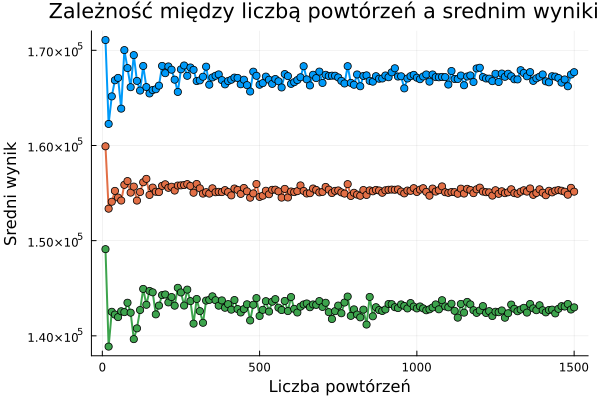

In [55]:
price_generated_A = 5.0
price_generated_B = 7.0
std_price_A = 0.05
std_price_B = 0.1
exchange_rate = avg_exchange_rate
std_exchange_rate = 0.05
salary = 7000.0
fuel_price = 4.6
fuel_variance = 0.01
fuel_consumption = 200.0
num_employees = 4
employee_salary = 4500.0
rent = 6000.0
demand_A = 500.0
demand_B = 400.0
std_demand_A = 20.0
std_demand_B = 30.0
polish_price_A = 60.0
polish_price_B = 100.0
liczba_powtorzen = 10:10:1500

w_sredni_wynik = Float64[]
w_percentyl_95 = []s
w_percentyl_5 = []

for powtorzenia in liczba_powtorzen
    wynik = wywolanie(price_generated_A, price_generated_B, std_price_A, std_price_B, exchange_rate, std_exchange_rate, salary, fuel_price, fuel_variance, fuel_consumption, num_employees, employee_salary, rent, demand_A, demand_B, std_demand_A, std_demand_B, polish_price_A, polish_price_B, powtorzenia)
    push!(w_sredni_wynik, wynik.sredni_wynik)
    push!(w_percentyl_95, wynik.percentyl_95)
    push!(w_percentyl_5, wynik.percentyl_5)
end

plot(liczba_powtorzen, w_percentyl_95, xlabel="Liczba powtórzeń", ylabel="Sredni wynik",
    title="Zależność między liczbą powtórzeń a srednim wynikiem",
    legend=false, linewidth=2, marker=:circle)

plot!(liczba_powtorzen, w_sredni_wynik, linewidth=2, marker=:circle, label="Średni wynik")
plot!(liczba_powtorzen, w_percentyl_5, linewidth=2, marker=:circle, label="Percentyl 5")

# Show the plot
plot!()

Na powyższym wykresie możemy zaobserować że wykres dosyć skacze przy wartościach od 10 i zaczyna się dopiero wyplaszczać przy liczbie powtórzeń ~ 1000. Więc zalecana minimalna ilość wykonywanych powtórzeń to 1000 

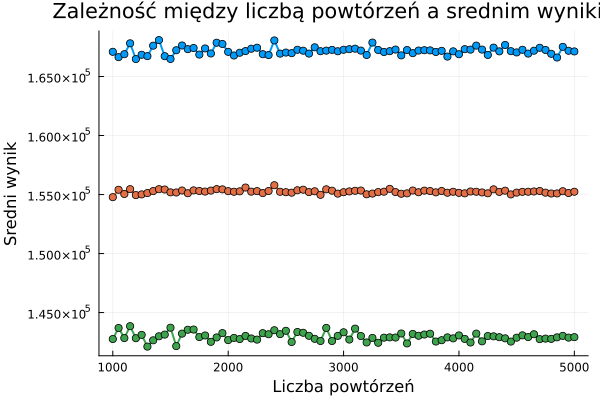

In [56]:
price_generated_A = 5.0
price_generated_B = 7.0
std_price_A = 0.05
std_price_B = 0.1
exchange_rate = avg_exchange_rate
std_exchange_rate = 0.05
salary = 7000.0
fuel_price = 4.6
fuel_variance = 0.01
fuel_consumption = 200.0
num_employees = 4
employee_salary = 4500.0
rent = 6000.0
demand_A = 500.0
demand_B = 400.0
std_demand_A = 20.0
std_demand_B = 30.0
polish_price_A = 60.0
polish_price_B = 100.0
liczba_powtorzen = 1000:50:5000

w_sredni_wynik = Float64[]
w_percentyl_95 = []
w_percentyl_5 = []

for powtorzenia in liczba_powtorzen
    wynik = wywolanie(price_generated_A, price_generated_B, std_price_A, std_price_B, exchange_rate, std_exchange_rate, salary, fuel_price, fuel_variance, fuel_consumption, num_employees, employee_salary, rent, demand_A, demand_B, std_demand_A, std_demand_B, polish_price_A, polish_price_B, powtorzenia)
    push!(w_sredni_wynik, wynik.sredni_wynik)
    push!(w_percentyl_95, wynik.percentyl_95)
    push!(w_percentyl_5, wynik.percentyl_5)
end

plot(liczba_powtorzen, w_percentyl_95, xlabel="Liczba powtórzeń", ylabel="Sredni wynik",
    title="Zależność między liczbą powtórzeń a srednim wynikiem",
    legend=false, linewidth=2, marker=:circle)

plot!(liczba_powtorzen, w_sredni_wynik, linewidth=2, marker=:circle, label="Średni wynik")
plot!(liczba_powtorzen, w_percentyl_5, linewidth=2, marker=:circle, label="Percentyl 5")

# Show the plot
plot!()


Zwiekszająć liczbę powtórzeń do 5000 nie dało to nam znacznej poprawy więc zalecaną wartością zakresu liczby powtórzeń powinna wynosić od 1000 do 2000.

## Wnioski i zalecenia

